In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster

# Cel biznesowy

'We are going to explore the usefulness of unsupervised clustering algorithms to help doctors understand which treatments might work with their patients. We are going to cluster anonymized data of patients who have been diagnosed with heart disease. Patients with similar characteristics might respond to the same treatments, and doctors could benefit from learning about the treatment outcomes of patients like those they are treating.' - tekst z Kaggle

Zatem nasz zbiór danych zawiera dane osób które mają problemy z sercem i naszym celem będzie pogrupowanie ich w jakiś sposób.

link: https://www.kaggle.com/datasets/kingabzpro/heart-disease-patients

Zatem cel: **Znalezienie pacjentów o podobnych charakterystykach i pogrupowanie ich**

# EDA

In [2]:
df = pd.read_csv("heart_disease_patients.csv")

In [3]:
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,1,63,1,1,145,233,1,2,150,0,2.3,3
1,2,67,1,4,160,286,0,2,108,1,1.5,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2
3,4,37,1,3,130,250,0,0,187,0,3.5,3
4,5,41,0,2,130,204,0,2,172,0,1.4,1


In [4]:
df.shape

(303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalach   303 non-null    int64  
 9   exang     303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slope     303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


In [6]:
df.tail()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
298,299,45,1,1,110,264,0,0,132,0,1.2,2
299,300,68,1,4,144,193,1,0,141,0,3.4,2
300,301,57,1,4,130,131,0,0,115,1,1.2,2
301,302,57,0,2,130,236,0,2,174,0,0.0,2
302,303,38,1,3,138,175,0,0,173,0,0.0,1


In [7]:
df.columns

Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope'],
      dtype='object')

**Wyjaśnienie znaczenia niektórych kolumn:**\
**cp** - chest pain type\
**trestbps** - resting blood pressure\
**chol** - serum colesterol\
**fbs** - fasting blood sugar\
**restecg** - resting electrocardiographic results\
**thalach** - maximum heart rate achieved\
**exang** - exercise induced angina (1=yes, 0=no) \
**oldpeak** -st depression induced by exercise relative to rest \
**slope** - the slope of the peak exercise ST segment

In [8]:
df = df.drop(columns='id')

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,63,1,1,145,233,1,2,150,0,2.3,3
1,67,1,4,160,286,0,2,108,1,1.5,2
2,67,1,4,120,229,0,2,129,1,2.6,2
3,37,1,3,130,250,0,0,187,0,3.5,3
4,41,0,2,130,204,0,2,172,0,1.4,1


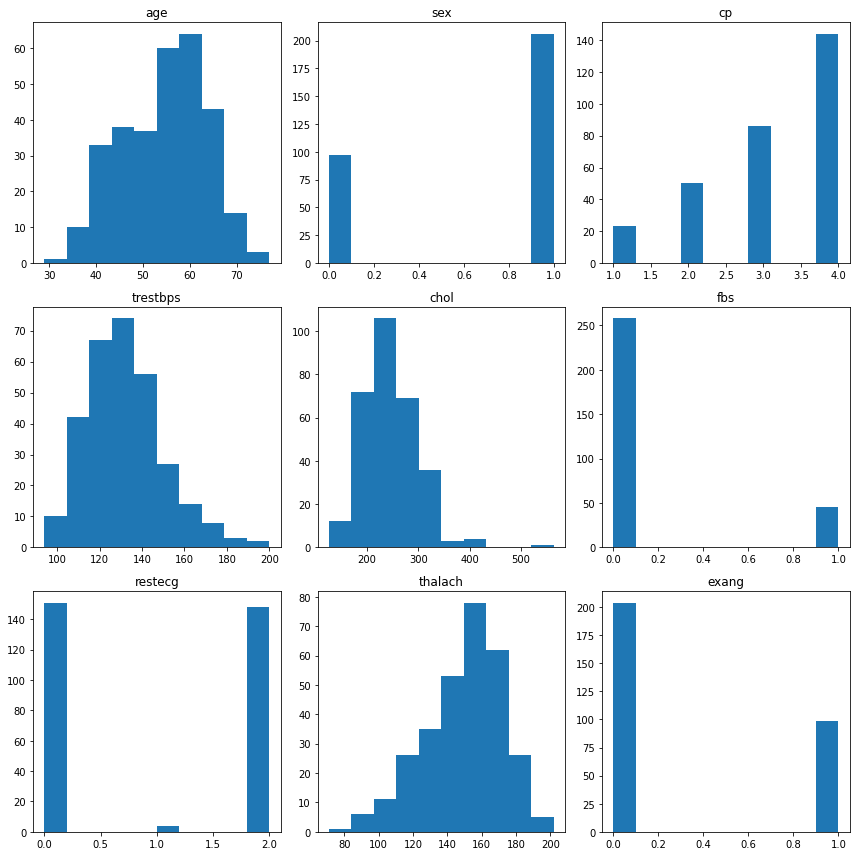

In [10]:
fig, axs = plt.subplots(3, 3,figsize = (12,12))
i=0
col = df.columns
for row in range(3):
    for column in range(3):
        axs[row,column].set_title(col[i])
        axs[row,column].hist(df[col[i]])
        i+=1
plt.tight_layout()
plt.show()

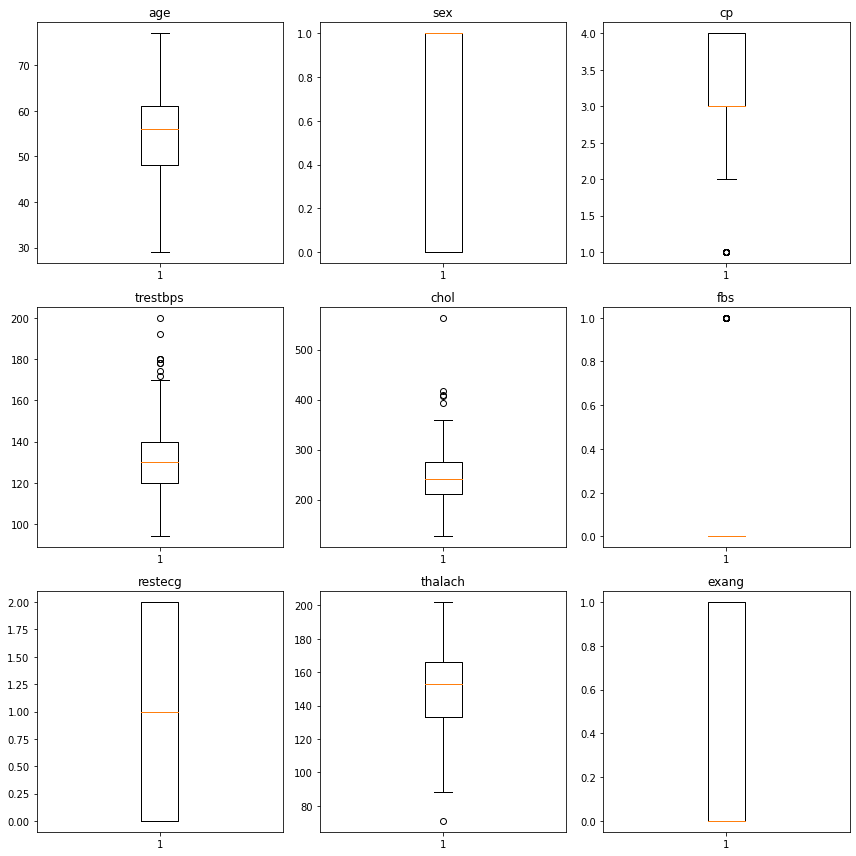

In [11]:
fig, axs = plt.subplots(3, 3,figsize = (12,12))
i=0
col = df.columns
for row in range(3):
    for column in range(3):
        axs[row,column].set_title(col[i])
        axs[row,column].boxplot(df[col[i]])
        i+=1
plt.tight_layout()
plt.show()

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


# Split

In [13]:
train, test = train_test_split(df)

In [14]:
train.shape

(227, 11)

In [15]:
test.shape

(76, 11)

In [16]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
64,54,1,4,120,188,0,0,113,0,1.4,2
201,64,0,4,180,325,0,0,154,1,0.0,1
222,39,0,3,94,199,0,0,179,0,0.0,1
128,44,1,2,120,220,0,0,170,0,0.0,1
290,67,1,3,152,212,0,2,150,0,0.8,2


In [17]:
test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
158,60,1,4,140,293,0,2,170,0,1.2,2
202,57,1,3,150,126,1,0,173,0,0.2,1
283,35,1,2,122,192,0,0,174,0,0.0,1
213,66,0,4,178,228,1,0,165,1,1.0,2
214,52,1,4,112,230,0,0,160,0,0.0,1


# Data preprocessing

In [18]:
pipeline1 = Pipeline([
    ('scaler', StandardScaler())
])

In [19]:
train_transformed = pipeline1.fit_transform(train)

In [20]:
train_transformed

array([[ 0.01051617,  0.66772739,  0.89794404, ..., -0.6746319 ,
         0.36708206,  0.7379302 ],
       [ 1.09559403, -1.49761715,  0.89794404, ...,  1.48228982,
        -0.84056472, -0.90432623],
       [-1.61710062, -1.49761715, -0.13674275, ..., -0.6746319 ,
        -0.84056472, -0.90432623],
       ...,
       [ 1.52962518, -1.49761715, -0.13674275, ..., -0.6746319 ,
         0.45334255,  0.7379302 ],
       [-0.42351497,  0.66772739,  0.89794404, ..., -0.6746319 ,
         1.40220787,  0.7379302 ],
       [-0.85754612,  0.66772739, -1.17142953, ..., -0.6746319 ,
        -0.84056472, -0.90432623]])

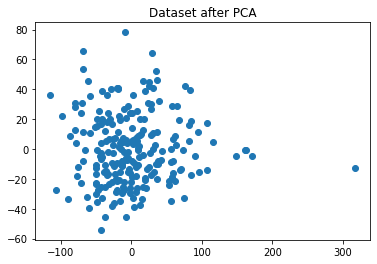

In [21]:
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train)
plt.scatter(train_pca[:,0],train_pca[:,1])
plt.title('Dataset after PCA')
plt.show()

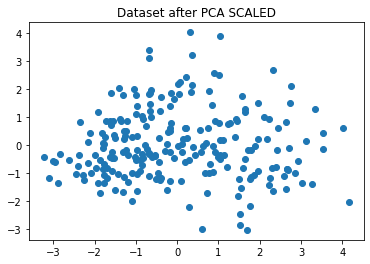

In [22]:
pca = PCA(n_components=2)
train_pca_transformed = pca.fit_transform(train_transformed)
plt.scatter(train_pca_transformed[:,0],train_pca_transformed[:,1])
plt.title('Dataset after PCA SCALED')
plt.show()

In [23]:
# o kurde :) -> czy to moze plec determinuje?

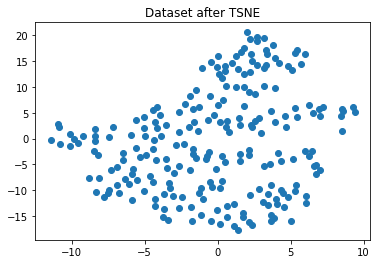

In [24]:
tsne = TSNE(n_components=2)
train_tsne = tsne.fit_transform(train)
plt.scatter(train_tsne[:,0],train_tsne[:,1])
plt.title('Dataset after TSNE')
plt.show()

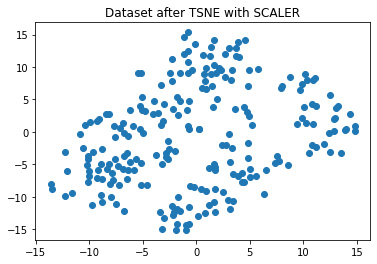

In [25]:
tsne = TSNE(n_components=2)
train_tsne_transformed = tsne.fit_transform(train_transformed)
plt.scatter(train_tsne_transformed[:,0],train_tsne_transformed[:,1])
plt.title('Dataset after TSNE with SCALER')
plt.show()

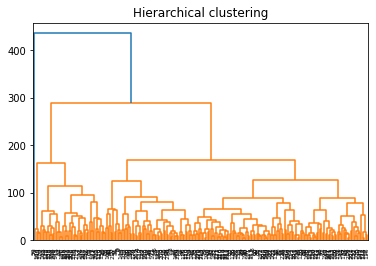

In [26]:
mergings = linkage(train, method = 'complete')

dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.title('Hierarchical clustering')
plt.show()


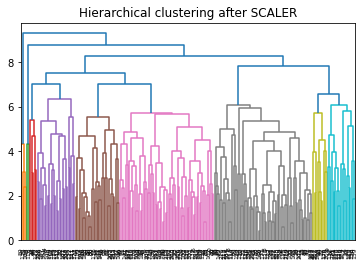

In [27]:
mergings = linkage(train_transformed, method = 'complete') #mozemy zmienic method 

dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.title('Hierarchical clustering after SCALER')
plt.show()


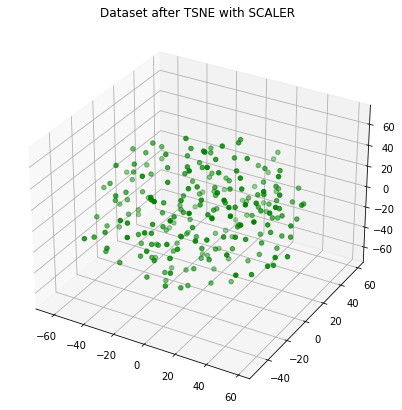

In [28]:
tsne = TSNE(n_components=3)
train_tsne_transformed = tsne.fit_transform(train_transformed)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(train_tsne_transformed[:,0], train_tsne_transformed[:,1], train_tsne_transformed[:,2], color = "green")
 
plt.title('Dataset after TSNE with SCALER')
plt.show()


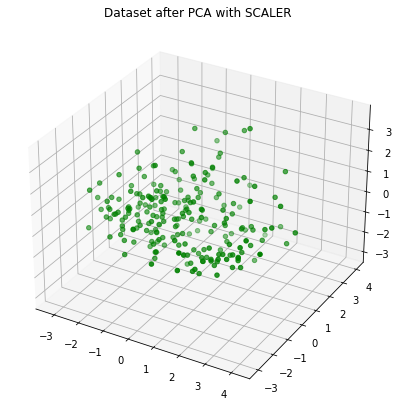

In [29]:
pca = PCA(n_components=3)
train_pca_transformed = pca.fit_transform(train_transformed)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(train_pca_transformed[:,0], train_pca_transformed[:,1], train_pca_transformed[:,2], color = "green")
 
plt.title('Dataset after PCA with SCALER')
plt.show()


# Dimension reduction - finding number of features in PCA

In [30]:
train.shape #mamy 11 kolumn

(227, 11)

In [34]:
var = []
for i in range(1,11):
    pca = PCA(n_components=i)
    pca.fit_transform(train)
    var.append(max(np.cumsum(pca.explained_variance_ratio_)))

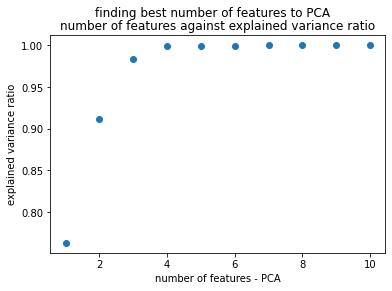

In [39]:
plt.scatter(range(1,11),var)
plt.xlabel('number of features - PCA')
plt.ylabel('explained variance ratio')
plt.title('number of features against explained variance ratio')
plt.suptitle('finding best number of features to PCA')
plt.show()